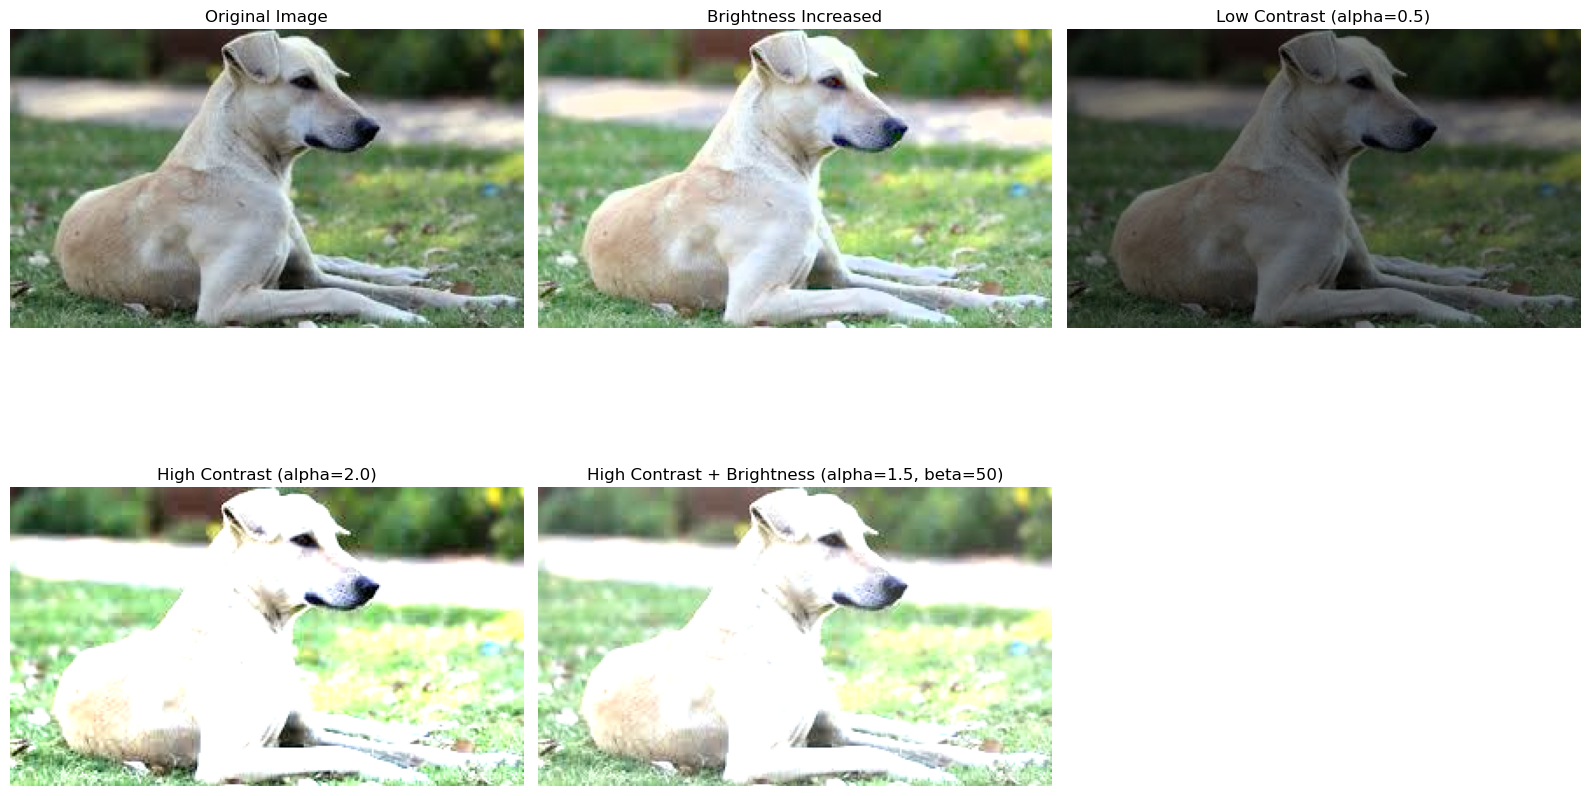

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'dog.jpg'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image is loaded
if img is None:
    print("Error: Image not found. Please check the path.")
    exit()

# Function to increase brightness
def increase_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV
    h, s, v = cv2.split(hsv)  # Split HSV channels
    v = cv2.add(v, value)  # Increase the V (brightness) channel
    v = np.clip(v, 0, 255)  # Ensure pixel values stay in range
    bright_hsv = cv2.merge((h, s, v))  # Merge back HSV channels
    bright_image = cv2.cvtColor(bright_hsv, cv2.COLOR_HSV2BGR)  # Convert back to BGR 
    return bright_image

# Function to adjust contrast using alpha-beta correction
def adjust_contrast(image, alpha, beta):
    # alpha: contrast (1.0 means no change)
    # beta: brightness adjustment (0 means no change)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Increase brightness
bright_image = increase_brightness(img, value=50)

# Adjust contrast using different alpha values
contrast_low = adjust_contrast(img, alpha=0.5, beta=0)  # Decrease contrast
contrast_high = adjust_contrast(img, alpha=2.0, beta=0)  # Increase contrast
contrast_with_brightness = adjust_contrast(img, alpha=1.5, beta=50)  # Adjust both

# Display results
titles = [
    "Original Image",
    "Brightness Increased",
    "Low Contrast (alpha=0.5)",
    "High Contrast (alpha=2.0)",
    "High Contrast + Brightness (alpha=1.5, beta=50)"
]
images = [img, bright_image, contrast_low, contrast_high, contrast_with_brightness]

plt.figure(figsize=(16, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')

plt.tight_layout()
plt.show()


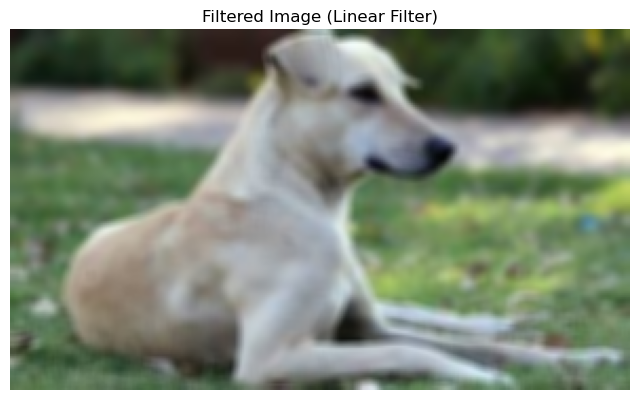

In [3]:
# Apply a linear filter to remove noise
filtered_image = cv2.blur(img, (5, 5))

# Display the filtered image
plt.figure(figsize=(8, 6))
plt.title("Filtered Image (Linear Filter)")
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show() 

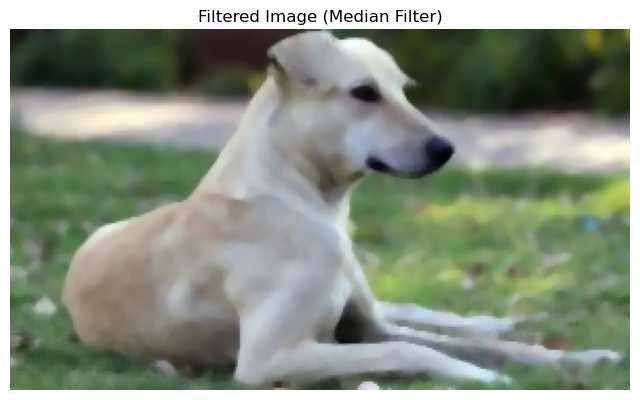

In [5]:
# Apply a median filter to remove noise
median_filtered_image = cv2.medianBlur(img, 5)

# Display the median filtered image
plt.figure(figsize=(8, 6))
plt.title("Filtered Image (Median Filter)")
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

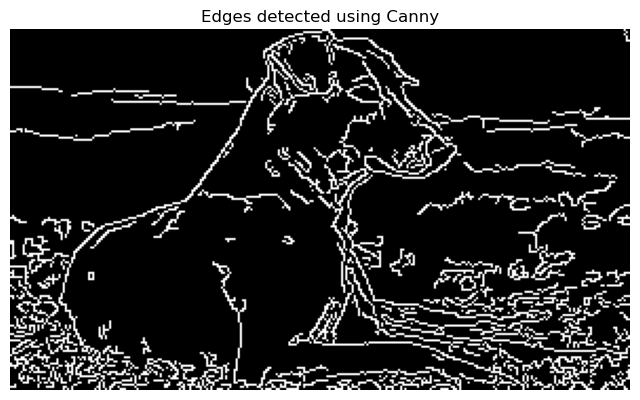

In [7]:
# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display the edges
plt.figure(figsize=(8, 6))
plt.title("Edges detected using Canny")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()